In [3]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv("hair_loss.csv")
df.head(5)

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
0,312,100,14,249,87,55,333,44,41,368,4
1,52,207,3,425,387,1,182,26,65,41,1
2,170,197,11,140,199,91,414,30,54,90,4
3,256,334,19,358,120,3,35,48,45,65,2
4,309,185,58,207,329,301,345,23,90,346,4


In [6]:
X = df[['total_protein','total_keratine','hair_texture','vitamin','manganese','iron','calcium','body_water_content','stress_level','liver_data']]
y = df["hair_fall"]

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [8]:
pipe = Pipeline(
  [
      ("scalar", StandardScaler()),
      ("pca", PCA(n_components=3)),
      ("estimator", DecisionTreeClassifier()),
  ],
  verbose=True,
)

In [9]:
from sklearn.model_selection import cross_val_score

CV = 5
scoring = "accuracy"

scores = cross_val_score(pipe, X, y, scoring=scoring, cv=CV)
print(f"{scoring}: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.1s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.8s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   4.0s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.2s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   2.1s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.2s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   1.4s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.1s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.4s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   1.7s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.2s
[Pipel

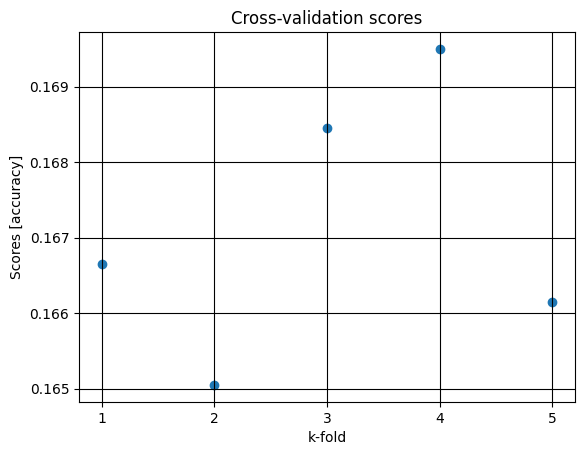

In [10]:
import matplotlib.pyplot as plt
import numpy as np

folds = np.arange(1, CV + 1)

plt.rc('grid', linestyle="-", color='black')
plt.scatter(x=folds, y=scores)
plt.xticks(folds)

plt.grid(True)

plt.title(f"Cross-validation scores")

plt.xlabel("k-fold")
plt.ylabel(f"Scores [{scoring}]")

plt.show()

In [11]:
scores = cross_val_score(pipe, X, y, scoring='f1_macro', cv=CV)
scores

[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.4s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   2.5s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.4s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   2.2s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.3s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   1.3s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.2s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   1.7s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.2s
[Pipel

array([0.16662574, 0.16929962, 0.16599935, 0.16844527, 0.16715596])

In [12]:
from sklearn.model_selection import cross_val_predict
CV = 5

y_pred = cross_val_predict(
    pipe,
    X,
    y,
    cv=CV,
)

[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.3s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   2.6s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.2s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   1.6s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.2s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   1.2s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.3s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   2.6s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.4s
[Pipel

In [18]:
print(y_pred.shape)
print(len(df))

(100000,)
100000


In [21]:
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, y_pred), display_labels=df[:len(np.unique(y_pred))])

In [22]:
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, y_pred), display_labels=np.unique(y_pred))

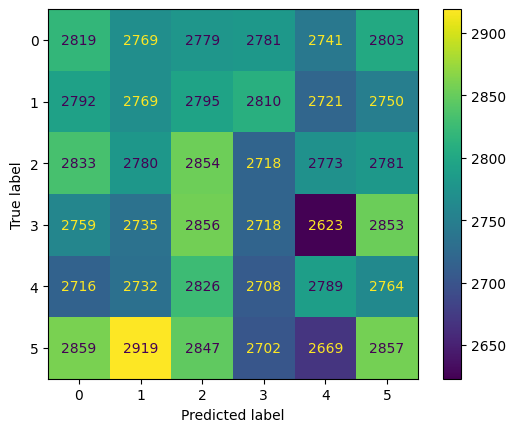

In [20]:
cm.plot();

In [23]:
import pickle
pipe.fit(X, y)

with open("pipe.bin", "wb") as f: pickle.dump(pipe, f)

[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.3s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   3.1s


In [28]:
# Add dummy features to match the expected number of features
X_pred_padded = np.pad(X_pred, (0, 6), mode='constant')

# Predict probabilities using the padded data
y_pred = _pipe.predict_proba(X_pred_padded)